In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

### Load Data

In [156]:
data = pd.read_csv("credit_card_clustering.csv")

In [157]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

### How many rows/columns are there?

In [158]:
data.shape

(8950, 18)

### How many customers are there?

In [159]:
data['CUST_ID'].nunique()

8950

We have 8950 unique customer IDs.

### How many customers belong to each tenure set?

In [160]:
data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

### How does the balance distribution of the customers look like?

In [161]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

The balance ranges from 0 to 19043.138560 with median=873.385231 and mean=1564.474828.

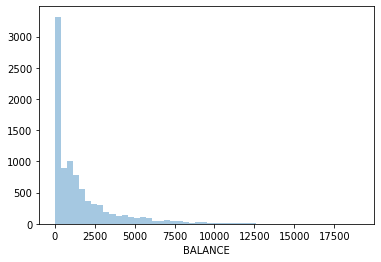

In [162]:
sns.distplot(data['BALANCE'], kde=False)

The balance distribution is skewed to the right.

### How does the cash advance distribution of the customers look like?

In [163]:
data['CASH_ADVANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean       978.871112
std       2097.163877
min          0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%        238.633724
70%        797.272297
80%       1574.933778
90%       3065.534560
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

The cash advance ranges from 0 to 47137.211760 with median= 0 and mean=978.871112.

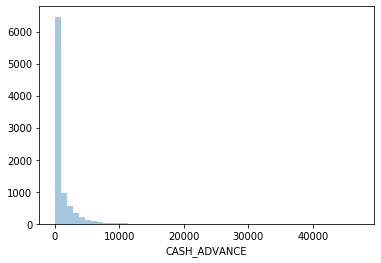

In [164]:
sns.distplot(data['CASH_ADVANCE'], kde=False)

The cash advance distribution is skewed to the right.

### How does the purchases frequency distribution of the customers look like?

In [165]:
data['PURCHASES_FREQUENCY'].describe(np.arange(0.1, 1, 0.1))

count    8950.000000
mean        0.490351
std         0.401371
min         0.000000
10%         0.000000
20%         0.000000
30%         0.083333
40%         0.250000
50%         0.500000
60%         0.666667
70%         0.857143
80%         1.000000
90%         1.000000
max         1.000000
Name: PURCHASES_FREQUENCY, dtype: float64

The purchase frequency ranges from 0 to 1 with median=0.5 and mean=0.490351.

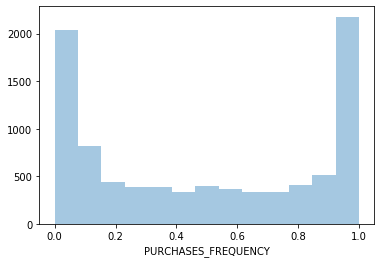

In [166]:
sns.distplot(data['PURCHASES_FREQUENCY'], kde=False)

The annual income ranges from 15 to 137 with an average (median) annual income is 61 k$.

# Clustering

In [167]:
# Get features we need
features = ['BALANCE', 'CASH_ADVANCE', 'PAYMENTS']
X = data[features]

X

,BALANCE,CASH_ADVANCE,PAYMENTS
0,40.900749,0.000000,201.802084
1,3202.467416,6442.945483,4103.032597
2,2495.148862,0.000000,622.066742
3,1666.670542,205.788017,0.000000
4,817.714335,0.000000,678.334763
...,...,...,...
8945,28.493517,0.000000,325.594462
8946,19.183215,0.000000,275.861322
8947,23.398673,0.000000,81.270775
8948,13.457564,36.558778,52.549959


### Choosing Optimal *k*

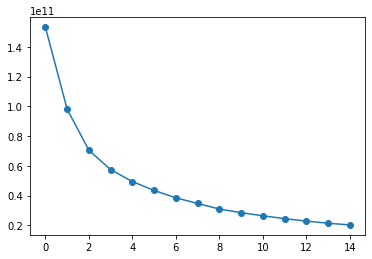

In [168]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,16):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use *k=4*.

In [169]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters = 4, random_state = 42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [170]:
new_data.head()

,BALANCE,CASH_ADVANCE,PAYMENTS,labels
0,40.900749,0.000000,201.802084,1
1,3202.467416,6442.945483,4103.032597,0
2,2495.148862,0.000000,622.066742,1
3,1666.670542,205.788017,0.000000,1
4,817.714335,0.000000,678.334763,1


### Plot Centers and labels

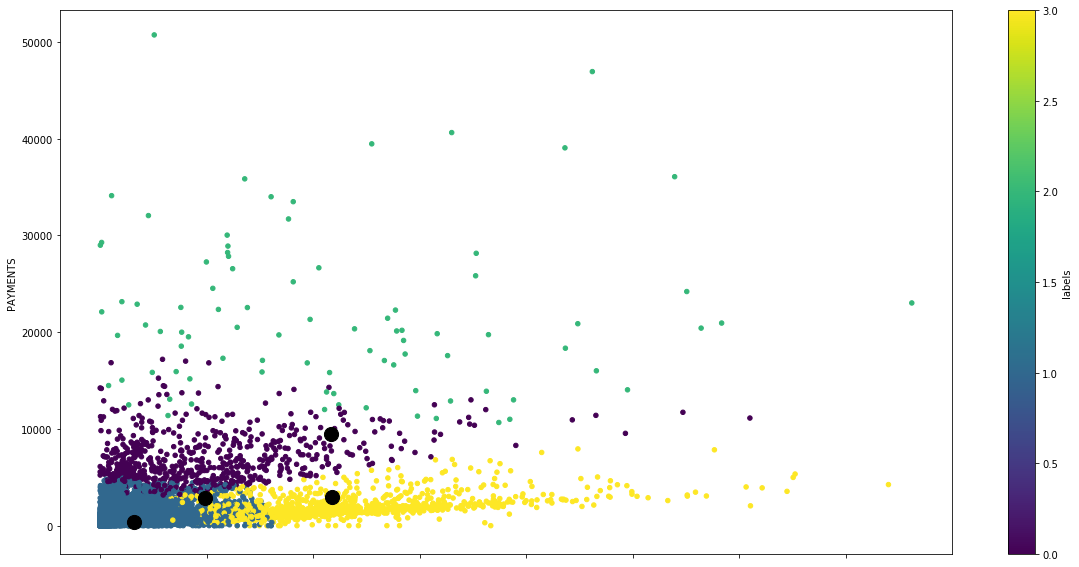

In [171]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='BALANCE', 
                      y='PAYMENTS', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

# Deep Dive to each cluster

In [172]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,BALANCE,CASH_ADVANCE,PAYMENTS,labels
count,670.000000,670.000000,670.000000,670.0
mean,2459.453776,2858.756850,6888.259976,0.0
std,2040.333953,3048.050808,2538.249632,0.0
min,0.000000,0.000000,2986.360610,0.0
25%,904.573849,0.000000,4978.822907,0.0
50%,1993.964220,2246.586305,6173.493747,0.0
75%,3422.008710,4468.891582,8247.689004,0.0
max,15244.748650,14926.790590,17194.627560,0.0


Cluster 0: Medium Balance, Medium Cash Advance & Medium Payments

In [173]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,BALANCE,CASH_ADVANCE,PAYMENTS,labels
count,7052.000000,7052.000000,7052.000000,7052.0
mean,805.367393,371.433728,976.347677,1.0
std,864.840136,715.289970,950.356310,0.0
min,0.000000,0.000000,0.000000,1.0
25%,75.756516,0.000000,312.607854,1.0
50%,473.743561,0.000000,630.895898,1.0
75%,1296.980000,403.313085,1331.405721,1.0
max,4104.710798,6479.639793,4924.941312,1.0


Cluster 1: Low Balance, Low Cash Advance & Low Payments

In [174]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,BALANCE,CASH_ADVANCE,PAYMENTS,labels
count,88.000000,88.000000,88.000000,88.0
mean,5427.126378,9491.950774,21659.188579,2.0
std,4019.964181,8989.899638,8346.256074,0.0
min,4.382924,0.000000,10664.658660,2.0
25%,2096.835682,67.523405,15838.944987,2.0
50%,4892.213660,8411.466034,20096.540445,2.0
75%,7892.014097,14942.829282,26008.267925,2.0
max,19043.138560,47137.211760,50721.483360,2.0


Cluster 2: High Balance, High Cash Advance & High Payments

In [175]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,BALANCE,CASH_ADVANCE,PAYMENTS,labels
count,1140.000000,1140.000000,1140.000000,1140.0
mean,5436.120789,2974.462324,1846.746384,3.0
std,2353.293840,2410.299680,1134.875302,0.0
min,166.295463,0.000000,0.000000,3.0
25%,3856.765310,1074.229078,1091.690547,3.0
50%,5008.327347,2711.378435,1553.152271,3.0
75%,6537.813566,4257.386513,2335.774822,3.0
max,18495.558550,14827.307160,7932.774020,3.0


Cluster 3: High Balance, Medium Cash Advance & Low Payments